# <font color = 'purple'> Twitch Chat EDA </font>

### Data
> *Data from category games > dota2, hearthstone
> *Top 3 Streams from ~10AM to ~1PM <br>
> *Obtained ~3 hours of data from 3 streamer channels from both dota2, and hearthstone<br>
> *Included a 7th streamer (edisonparklive) who was playing games at the time of this data for comparison

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import pandas as pd
import os
import datetime
# from datetime import datetime
from collections import Counter #for creating word list dictionary
from wordcloud import WordCloud, STOPWORDS #for wordcloud
import nltk
from nltk.corpus import stopwords #to get list of common words

from itertools import product

%matplotlib inline
plt.style.use('ggplot')

### Generic Functions


In [45]:
#from https://stackoverflow.com/questions/3463930/how-to-round-the-minute-of-a-datetime-object-python/10854034#10854034

def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [ ]:
#sends a notification to when a process has been completed

def notify(title, text):
    os.system("""
              osascript -e 'display notification "{}" with title "{}"'
              """.format(text, title))
    
# notify("Title", "Heres an alert")

## Creating the Twitch Chat Dataframe

### Dataframe Function

this function will take all of the files it has been given (as a list), and generate a combined pandas dataframe

In [68]:
def create_chat_df(folder):
    '''
    takes a channel_name of a streamer, returns a dataframe of that channel name from the log file
    
    Parameters
    ----------
    flist: list (list of file names)
        must also have a matching log file to the list in the chat_data_log folder

    Returns
    -------
    pandas dataframe
    '''
    
    #generates list of .log files from the folder given 
    print("generating... list of .log files\n")
    file_list = []
    for file in os.listdir(folder):
        if file.endswith(".log"):
            file_list.append(file)
    
    print("creating df...\n")
    df = pd.DataFrame(columns=['game', 'channel', 'timestamp', 'user_name', 'chat_msg']) #initializes the dataframe

    line_counter = 0
    total_line_errors = 0
    
    # for each .log file in the folder, this goes through and extracts all of the relevant data and exports them into a pandas df
    for file in file_list:
        
        game_type = file[:file.index('_')] #extracts game type
        channel = file[file.index('_')+1:-9] #extracts channel name
        line_errors = 0
        error_list = []
        
        print("inserting chat data for: ", game_type, channel)
        chat_log_file = folder+"/"+file
    
        #write chat msg data to df
        with open(chat_log_file, "r") as f:
            for line in f:
                if(len(line)>1):
                    
                    #get timestamp
                    timestamp = line[0:19]
                    try:
                        timestamp = datetime.datetime.strptime(timestamp.replace('_',' '),'%Y-%m-%d %H:%M:%S') #'2019-05-31_09:48:04'
                        timestamp = roundTime(timestamp, roundTo=60) #rounds to minute
                        go_after_timestamp=True #variable to know to keep going
                    except:
                        print(line_counter, "timestamp error...", line)
                        line_errors += 1
                        go_after_timestamp=False
                    
                    if(go_after_timestamp==True):
                        
                        #get username
                        try:
                            username = line[23:line.index('!')] #gets the username from the chat
                            go_after_username=True
                        except:
                            print(line_counter, "username error...")
                            line_errors += 1
                            go_after_username=False
                        
                        #get msg
                        if(go_after_username==True):
                            find_chat_start = line[23:].find(':')+23
                            msg = line[find_chat_start+1:].rstrip("\n")
                            
                            #enters data into df
#                             print((line_counter, timestamp, username, msg))
                            df.loc[line_counter] = (game_type, channel, timestamp, username, msg)

                    #reset variables
                    timestamp=""
                    username=""
                    msg=""
                    go_after_timestamp==False
                    line_counter += 1 #line counter
                
            #print and store errors
            error = str(channel) + " had " + str(line_errors) + " line errors."
            print(error)
            error_list.append(error) #keep track of errors by channel
            
    print("\n...df complete!\n")
    print("Had " + str(total_line_errors) + " line errors.")
    
    return df

In [69]:
error_list

In [67]:
timestamp = timestamp.to_pydatetime()

AttributeError: 'datetime.datetime' object has no attribute 'to_pydatetime'

### Creating the Chat dataframe

Generating a dataframe from the chat log files

In [76]:
# folder = '../chat_log_data/test'
folder = '../chat_log_data'

In [77]:
# creates pandas df based on all logs files in the specified folder
# then sorts df by game, channel, timestamp

# df = create_chat_df(folder).sort_values(by = ['game', 'channel', 'timestamp']).reset_index()
# notify("Twitch Chat", "DF is complete!")

generating... list of .log files

creating df...

inserting chat data for:  HS playhearthstoneru
215 timestamp error... :gtrwhsh!gtrwhsh@gtrwhsh.tmi.twitch.tv PRIVMSG #playhearthstoneru :Рандомь

252 timestamp error... :fobbry!fobbry@fobbry.tmi.twitch.tv PRIVMSG #playhearthstoneru :ой дурак

318 timestamp error... :ghosneax!ghosneax@ghosneax.tmi.twitch.tv PRIVMSG #playhearthstoneru :Паша красавчик паладин топ

1154 timestamp error... :justmirlin!justmirlin@justmirlin.tmi.twitch.tv PRIVMSG #playhearthstoneru :Вэдьма!! SMOrc SMOrc SMOrc

1241 timestamp error... :vladelin!vladelin@vladelin.tmi.twitch.tv PRIVMSG #playhearthstoneru :сиськи

1297 timestamp error... :mills90!mills90@mills90.tmi.twitch.tv PRIVMSG #playhearthstoneru :попец гароша

1547 timestamp error... :sonnymay!sonnymay@sonnymay.tmi.twitch.tv PRIVMSG #playhearthstoneru :рулетка крутится лавэха мутиться s1lver777 s1lver777 s1lver777

1556 timestamp error... :tijey7777777!tijey7777777@tijey7777777.tmi.twitch.tv PRIVMSG #playhe

5980 timestamp error... :autobalance!autobalance@autobalance.tmi.twitch.tv PRIVMSG #esl_dota2 :MORPH LULW

6042 timestamp error... :simondominic2!simondominic2@simondominic2.tmi.twitch.tv PRIVMSG #esl_dota2 :LIMP WATER WutFace

6086 timestamp error... :dota3fox!dota3fox@dota3fox.tmi.twitch.tv PRIVMSG #esl_dota2 :@admiralbulldog WHAT NOW?

6114 timestamp error... :rawmeatdelivery!rawmeatdelivery@rawmeatdelivery.tmi.twitch.tv PRIVMSG #esl_dota2 :@triloo_ i guess im punching down... if ya know what i mean

6191 timestamp error... :redwinter123!redwinter123@redwinter123.tmi.twitch.tv PRIVMSG #esl_dota2 :@lmfaoo146 he does literally everything - chase, stun, escape, nuke, right click...

6383 timestamp error... :psyclone996!psyclone996@psyclone996.tmi.twitch.tv PRIVMSG #esl_dota2 :nearly manta NotLikeThis NotLikeThis

6413 timestamp error... :mwaleedm!mwaleedm@mwaleedm.tmi.twitch.tv PRIVMSG #esl_dota2 :PogChamp zaii

6600 timestamp error... :heavenzownz!heavenzownz@heavenzownz.tmi.twitch.tv

10811 timestamp error... :hotdogman400!hotdogman400@hotdogman400.tmi.twitch.tv PRIVMSG #esl_dota2 :PepeHands

10820 timestamp error... :luccasrafael!luccasrafael@luccasrafael.tmi.twitch.tv PRIVMSG #esl_dota2 :revenge for russians

10924 timestamp error... :wakokow!wakokow@wakokow.tmi.twitch.tv PRIVMSG #esl_dota2 :Clap

11001 timestamp error... :curseofwinter!curseofwinter@curseofwinter.tmi.twitch.tv PRIVMSG #esl_dota2 :I HATE PURGE

11010 timestamp error... :wade77!wade77@wade77.tmi.twitch.tv PRIVMSG #esl_dota2 :CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard CEB? TriHard

11011 timestamp error... :jamie_juthapich!jamie_juthapich@jamie_juthapich.tmi.twitch.tv PRIVMSG #esl_dota2 :Purge SeemsGood

11054 timestamp error... :feelgoodstoya!feelgoodstoya@feelgoodstoya.tmi.twitch.tv PRIVMSG #esl_dota2 :PURGE ResidentSleeper WutFace ResidentSleeper

11060 timestamp error... :kazeraionx12!kazeraionx12@kazeraionx12

14872 timestamp error... :jesuschrixt!jesuschrixt@jesuschrixt.tmi.twitch.tv PRIVMSG #esl_dota2 :PUPPEY POG

15042 timestamp error... :hi_there_007!hi_there_007@hi_there_007.tmi.twitch.tv PRIVMSG #esl_dota2 :PogChamp

15083 timestamp error... :zharray!zharray@zharray.tmi.twitch.tv PRIVMSG #esl_dota2 :GOT LUL

15095 timestamp error... :kikokumaru!kikokumaru@kikokumaru.tmi.twitch.tv PRIVMSG #esl_dota2 :LUL

15096 timestamp error... :makavelissbu!makavelissbu@makavelissbu.tmi.twitch.tv PRIVMSG #esl_dota2 :LUL this is the worst ad LUL

15200 timestamp error... :nicerchile!nicerchile@nicerchile.tmi.twitch.tv PRIVMSG #esl_dota2 :Song name

15581 timestamp error... :kenzu420!kenzu420@kenzu420.tmi.twitch.tv PRIVMSG #esl_dota2 :NA COMING THROUGH LUL GO TO SCHOOL RISK LIFE LUL 10 IQ PRESIDENT LUL GETTING MY SISTER PREGNANT LUL WALL LUL THINK THEY SAVED WORLD WAR LUL NA EDUCATION LUL GOVERMENT SO BAD HAD TO SHUT DOWN LUL 45

15646 timestamp error... :kalandra!kalandra@kalandra.tmi.twitch.tv PRIVMS

19879 timestamp error... :13bordereagle!13bordereagle@13bordereagle.tmi.twitch.tv PRIVMSG #esl_dota2 :NA DOTA Kreygasm EU DOTA OMEGALUL

19880 timestamp error... :kyle_is_wrong_again!kyle_is_wrong_again@kyle_is_wrong_again.tmi.twitch.tv PRIVMSG #esl_dota2 :OG OUT LULW LIQUID OUT LULW ALLIANCE OUT LULW NIP OUT LULW

19981 timestamp error... :rebendingkhan!rebendingkhan@rebendingkhan.tmi.twitch.tv PRIVMSG #esl_dota2 :Pog

20115 timestamp error... :vanpercy09xd!vanpercy09xd@vanpercy09xd.tmi.twitch.tv PRIVMSG #esl_dota2 :CM DAMAGE PogU

20277 timestamp error... :pride_ufo!pride_ufo@pride_ufo.tmi.twitch.tv PRIVMSG #esl_dota2 :277 or 322?????

20325 timestamp error... :jowelsz101!jowelsz101@jowelsz101.tmi.twitch.tv PRIVMSG #esl_dota2 :BUYACA BUYACA

20366 timestamp error... :pha__z!pha__z@pha__z.tmi.twitch.tv PRIVMSG #esl_dota2 :sssssss-sven+

20393 timestamp error... :lanayaq!lanayaq@lanayaq.tmi.twitch.tv PRIVMSG #esl_dota2 :ZVEN BrokeBack

20409 timestamp error... :teaser_eprst!teaser_eprs

23504 timestamp error... :westforlan!westforlan@westforlan.tmi.twitch.tv PRIVMSG #esl_dota2 :thanks purge

23563 timestamp error... :toks01!toks01@toks01.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood SALAMAT PURGE SeemsGood

23684 timestamp error... :bloer!bloer@bloer.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood спасибо Борис SeemsGood

23708 timestamp error... :humpy_mcspank!humpy_mcspank@humpy_mcspank.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood SBESIBA PURGE SeemsGood

23709 timestamp error... :spawn5301!spawn5301@spawn5301.tmi.twitch.tv PRIVMSG #esl_dota2 :thanks purge

23710 timestamp error... :zestymon!zestymon@zestymon.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood HVALA PURGE SeemsGood

23767 timestamp error... :conturts!conturts@conturts.tmi.twitch.tv PRIVMSG #esl_dota2 :Sheevs Pog

23771 timestamp error... :ravolol!ravolol@ravolol.tmi.twitch.tv PRIVMSG #esl_dota2 :WutFace

23781 timestamp error... :kalandra!kalandra@kalandra.tmi.twitch.tv PRIVMSG #esl_dota2 :monkaMEGA

23838 timesta

27877 timestamp error... :voi__!voi__@voi__.tmi.twitch.tv PRIVMSG #esl_dota2 :China not even trying LUL

27892 timestamp error... :jarwojanggal!jarwojanggal@jarwojanggal.tmi.twitch.tv PRIVMSG #esl_dota2 :afk

27910 timestamp error... :cs1cs0cs1cs!cs1cs0cs1cs@cs1cs0cs1cs.tmi.twitch.tv PRIVMSG #esl_dota2 :322 LUL

27997 timestamp error... :linus10!linus10@linus10.tmi.twitch.tv PRIVMSG #esl_dota2 :EZ Clap

28002 timestamp error... :sufrexxdxdxd!sufrexxdxdxd@sufrexxdxdxd.tmi.twitch.tv PRIVMSG #esl_dota2 :322 LUL

28010 timestamp error... :iaminnocent90!iaminnocent90@iaminnocent90.tmi.twitch.tv PRIVMSG #esl_dota2 :3-22 BlessRNG

28189 timestamp error... :sanopower58!sanopower58@sanopower58.tmi.twitch.tv PRIVMSG #esl_dota2 :PogChamp

28248 timestamp error... :00sinjester!00sinjester@00sinjester.tmi.twitch.tv PRIVMSG #esl_dota2 :3

28256 timestamp error... :chupacabraiii!chupacabraiii@chupacabraiii.tmi.twitch.tv PRIVMSG #esl_dota2 :3-22 BlessRNG BlessRNG betchBLESS

28265 timestamp error... :

30392 timestamp error... :mankdemer37!mankdemer37@mankdemer37.tmi.twitch.tv PRIVMSG #esl_dota2 :PepeHands

30447 timestamp error... :cherrysaika!cherrysaika@cherrysaika.tmi.twitch.tv PRIVMSG #esl_dota2 :medusa damn pusseh

30472 timestamp error... :scpali!scpali@scpali.tmi.twitch.tv PRIVMSG #esl_dota2 :bash monkaS

30485 timestamp error... :lyricaldota!lyricaldota@lyricaldota.tmi.twitch.tv PRIVMSG #esl_dota2 :fade god

30526 timestamp error... :uwe_richter!uwe_richter@uwe_richter.tmi.twitch.tv PRIVMSG #esl_dota2 :LIL

30588 timestamp error... :riskychris!riskychris@riskychris.tmi.twitch.tv PRIVMSG #esl_dota2 :644

30618 timestamp error... :djjavick!djjavick@djjavick.tmi.twitch.tv PRIVMSG #esl_dota2 :Pog

30625 timestamp error... :tzuchienhsu!tzuchienhsu@tzuchienhsu.tmi.twitch.tv PRIVMSG #esl_dota2 :POG SVEN

30644 timestamp error... :eltigrechang100!eltigrechang100@eltigrechang100.tmi.twitch.tv PRIVMSG #esl_dota2 :"322" FeelsWeirdManW

30645 timestamp error... :eksdeeboi69z!eksdeeboi69

33112 timestamp error... :akikage!akikage@akikage.tmi.twitch.tv PRIVMSG #esl_dota2 :1 NA 1 CN 1 CIS 1 SEA 1 EU

33395 timestamp error... :greger24688!greger24688@greger24688.tmi.twitch.tv PRIVMSG #esl_dota2 :#1

33425 timestamp error... :ravolol!ravolol@ravolol.tmi.twitch.tv PRIVMSG #esl_dota2 :#IMMERSION

33641 timestamp error... :thura98!thura98@thura98.tmi.twitch.tv PRIVMSG #esl_dota2 :#fng

33656 timestamp error... :sakinyan357!sakinyan357@sakinyan357.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood SeemsGood

33730 timestamp error... :gradecurve!gradecurve@gradecurve.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood

33791 timestamp error... :poffinator!poffinator@poffinator.tmi.twitch.tv PRIVMSG #esl_dota2 :SeemsGood

33843 timestamp error... :takyonn808!takyonn808@takyonn808.tmi.twitch.tv PRIVMSG #esl_dota2 :OMEGALUL G

33844 timestamp error... :zennithy!zennithy@zennithy.tmi.twitch.tv PRIVMSG #esl_dota2 :whos waiting at UB?

33946 timestamp error... :kyle8292!kyle8292@kyle8292.tmi.twitch.

40314 timestamp error... :proanimeplayer!proanimeplayer@proanimeplayer.tmi.twitch.tv PRIVMSG #dota2ruhub :Увтьер

40360 timestamp error... :k0nstantinum!k0nstantinum@k0nstantinum.tmi.twitch.tv PRIVMSG #dota2ruhub :НАЙС ТП

40533 timestamp error... :krono_911!krono_911@krono_911.tmi.twitch.tv PRIVMSG #dota2ruhub :EleGiggle EleGiggle EleGiggle

40637 timestamp error... :evilartha2!evilartha2@evilartha2.tmi.twitch.tv PRIVMSG #dota2ruhub :Сикрет отлетят на инте прям как в 2015 LUL

40741 timestamp error... :foxtime6666!foxtime6666@foxtime6666.tmi.twitch.tv PRIVMSG #dota2ruhub :ахзазхзхазхазха

40753 timestamp error... :moritv!moritv@moritv.tmi.twitch.tv PRIVMSG #dota2ruhub :Ахахаххахаха

40804 timestamp error... :mrchelski!mrchelski@mrchelski.tmi.twitch.tv PRIVMSG #dota2ruhub :аххаха

40820 timestamp error... :gladiatornond!gladiatornond@gladiatornond.tmi.twitch.tv PRIVMSG #dota2ruhub :PogChamp PogChamp PogChamp

40847 timestamp error... :adelixen!adelixen@adelixen.tmi.twitch.tv PRIVMSG #d

45535 timestamp error... :i_am_tobi_king!i_am_tobi_king@i_am_tobi_king.tmi.twitch.tv PRIVMSG #dota2ruhub :BibleThump BibleThump BibleThump

45579 timestamp error... :xanaxboy174!xanaxboy174@xanaxboy174.tmi.twitch.tv PRIVMSG #dota2ruhub :Изи

45813 timestamp error... :flatonik!flatonik@flatonik.tmi.twitch.tv PRIVMSG #dota2ruhub :Там в чате на дота тв хохелы наглеют

45909 timestamp error... :steel2288!steel2288@steel2288.tmi.twitch.tv PRIVMSG #dota2ruhub :3

45936 timestamp error... :mikehanovsky!mikehanovsky@mikehanovsky.tmi.twitch.tv PRIVMSG #dota2ruhub :а 3 просто агонь

45971 timestamp error... :akalesei!akalesei@akalesei.tmi.twitch.tv PRIVMSG #dota2ruhub :Ахахаха

45972 timestamp error... :subzero8561!subzero8561@subzero8561.tmi.twitch.tv PRIVMSG #dota2ruhub :322

45993 timestamp error... :molot9873!molot9873@molot9873.tmi.twitch.tv PRIVMSG #dota2ruhub :ДОМОЙ СКА НАХ

46036 timestamp error... :lockie56!lockie56@lockie56.tmi.twitch.tv PRIVMSG #dota2ruhub :Белорусские вперед!

46124 

50069 timestamp error... :ssnejinka!ssnejinka@ssnejinka.tmi.twitch.tv PRIVMSG #dota2ruhub :???????????

50082 timestamp error... :russkiymishka!russkiymishka@russkiymishka.tmi.twitch.tv PRIVMSG #dota2ruhub :??

50175 timestamp error... :edmansurov!edmansurov@edmansurov.tmi.twitch.tv PRIVMSG #dota2ruhub :PogChamp

50520 timestamp error... :nekraosov!nekraosov@nekraosov.tmi.twitch.tv PRIVMSG #dota2ruhub :ахахахах

50820 timestamp error... :snegtlt!snegtlt@snegtlt.tmi.twitch.tv PRIVMSG #dota2ruhub :322

50855 timestamp error... :lifesagame!lifesagame@lifesagame.tmi.twitch.tv PRIVMSG #dota2ruhub :ЗАКИДОН

50954 timestamp error... :puffinz777!puffinz777@puffinz777.tmi.twitch.tv PRIVMSG #dota2ruhub :кем куплено?

50969 timestamp error... :musimplybest!musimplybest@musimplybest.tmi.twitch.tv PRIVMSG #dota2ruhub :иммершен батя

51013 timestamp error... :eva_grotova!eva_grotova@eva_grotova.tmi.twitch.tv PRIVMSG #dota2ruhub :777

51045 timestamp error... :derv1sh_!derv1sh_@derv1sh_.tmi.twitch.tv

54520 timestamp error... :leethaxxor!leethaxxor@leethaxxor.tmi.twitch.tv PRIVMSG #dota2ruhub :17

54562 timestamp error... :sou1hunter_!sou1hunter_@sou1hunter_.tmi.twitch.tv PRIVMSG #dota2ruhub :опять земелю понерфят BibleThump BibleThump BibleThump BibleThump

54602 timestamp error... :puffinz777!puffinz777@puffinz777.tmi.twitch.tv PRIVMSG #dota2ruhub :Кристалмей ставил на Гамбит

54740 timestamp error... :followdambo!followdambo@followdambo.tmi.twitch.tv PRIVMSG #dota2ruhub :Андердог фнг

54745 timestamp error... :fantastic_ts!fantastic_ts@fantastic_ts.tmi.twitch.tv PRIVMSG #dota2ruhub :FrankerZ FrankerZ FrankerZ

54753 timestamp error... :33mrowl!33mrowl@33mrowl.tmi.twitch.tv PRIVMSG #dota2ruhub :KappaPride

54769 timestamp error... :equa4ka!equa4ka@equa4ka.tmi.twitch.tv PRIVMSG #dota2ruhub :версуты

54784 timestamp error... :dovadenogla!dovadenogla@dovadenogla.tmi.twitch.tv PRIVMSG #dota2ruhub :МТС PogChamp PogChamp PogChamp МТС PogChamp PogChamp PogChamp МТС PogChamp PogChamp PogC

56652 timestamp error... :d0ng_d0ng!d0ng_d0ng@d0ng_d0ng.tmi.twitch.tv PRIVMSG #admiralbulldog :me :)

56653 timestamp error... :m133225!m133225@m133225.tmi.twitch.tv PRIVMSG #admiralbulldog :KKomrade

57077 timestamp error... :jasonwecksell!jasonwecksell@jasonwecksell.tmi.twitch.tv PRIVMSG #admiralbulldog :4HEad

57410 timestamp error... :x2314!x2314@x2314.tmi.twitch.tv PRIVMSG #admiralbulldog :WutFace VOICE

57468 timestamp error... :eotlling93!eotlling93@eotlling93.tmi.twitch.tv PRIVMSG #admiralbulldog :Pepega ONE

57523 timestamp error... :let1tsnow!let1tsnow@let1tsnow.tmi.twitch.tv PRIVMSG #admiralbulldog :PepeScoots

57636 timestamp error... :vaderek_xd!vaderek_xd@vaderek_xd.tmi.twitch.tv PRIVMSG #admiralbulldog :76

57682 timestamp error... :miti4a97!miti4a97@miti4a97.tmi.twitch.tv PRIVMSG #admiralbulldog :76

57821 timestamp error... :arvindsg!arvindsg@arvindsg.tmi.twitch.tv PRIVMSG #admiralbulldog :56 OG

57823 timestamp error... :okiknow!okiknow@okiknow.tmi.twitch.tv PRIVMSG #

61340 timestamp error... :xxxweebnation!xxxweebnation@xxxweebnation.tmi.twitch.tv PRIVMSG #admiralbulldog :PogU

61346 timestamp error... :staryrz!staryrz@staryrz.tmi.twitch.tv PRIVMSG #admiralbulldog :Pog

61537 timestamp error... :wantedfeeder!wantedfeeder@wantedfeeder.tmi.twitch.tv PRIVMSG #admiralbulldog :WTFF

61577 timestamp error... :timoxers!timoxers@timoxers.tmi.twitch.tv PRIVMSG #admiralbulldog :MaN

61578 timestamp error... :leeriapkc!leeriapkc@leeriapkc.tmi.twitch.tv PRIVMSG #admiralbulldog :ELAITOH IM HERE PogU

61605 timestamp error... :timoxers!timoxers@timoxers.tmi.twitch.tv PRIVMSG #admiralbulldog :gachiW

61629 timestamp error... :boilingrage0_0!boilingrage0_0@boilingrage0_0.tmi.twitch.tv PRIVMSG #admiralbulldog :THIS WAS THE SNIPER "NOOOO"

61635 timestamp error... PING :tmi.twitch.tv

61693 timestamp error... :aaejii!aaejii@aaejii.tmi.twitch.tv PRIVMSG #admiralbulldog :Pog

61951 timestamp error... :devzz!devzz@devzz.tmi.twitch.tv PRIVMSG #admiralbulldog :peepoRIP



71112 timestamp error... :ekmiikle!ekmiikle@ekmiikle.tmi.twitch.tv PRIVMSG #playhearthstone :weapon > shark n00bs

71131 timestamp error... :kleiny88!kleiny88@kleiny88.tmi.twitch.tv PRIVMSG #playhearthstone :gooder lu

71132 timestamp error... :trauski!trauski@trauski.tmi.twitch.tv PRIVMSG #playhearthstone :Pepega

71149 timestamp error... :jobraz27!jobraz27@jobraz27.tmi.twitch.tv PRIVMSG #playhearthstone :thijs ... stop taking face damage !!!!!!!!!!

71307 timestamp error... :copri_ow!copri_ow@copri_ow.tmi.twitch.tv PRIVMSG #playhearthstone :????????

71308 timestamp error... :rexxor420!rexxor420@rexxor420.tmi.twitch.tv PRIVMSG #playhearthstone :LUL

71366 timestamp error... :lovethewayyoudie!lovethewayyoudie@lovethewayyoudie.tmi.twitch.tv PRIVMSG #playhearthstone :nice player Pog

71377 timestamp error... :hyakka1!hyakka1@hyakka1.tmi.twitch.tv PRIVMSG #playhearthstone :gabrie14Que gabrie14Que gabrie14Que

71449 timestamp error... :mikedear!mikedear@mikedear.tmi.twitch.tv PRIVMSG #pla

76008 timestamp error... :tobias491!tobias491@tobias491.tmi.twitch.tv PRIVMSG #playhearthstone :monkaS

76057 timestamp error... :clearlynt!clearlynt@clearlynt.tmi.twitch.tv PRIVMSG #playhearthstone :SMOrc

76068 timestamp error... :q868686qq!q868686qq@q868686qq.tmi.twitch.tv PRIVMSG #playhearthstone :SMOrc GOOOD

76290 timestamp error... :nomatt!nomatt@nomatt.tmi.twitch.tv PRIVMSG #playhearthstone :WeirdChamp FeelsWeirdMan

76392 timestamp error... :nomatt!nomatt@nomatt.tmi.twitch.tv PRIVMSG #playhearthstone :concede now WeirdChamp

76490 timestamp error... :phillius_oetzi!phillius_oetzi@phillius_oetzi.tmi.twitch.tv PRIVMSG #playhearthstone :SMOrc Skill

76510 timestamp error... :icemanarl!icemanarl@icemanarl.tmi.twitch.tv PRIVMSG #playhearthstone :H SMOrc U SMOrc F SMOrc F SMOrc E SMOrc R

76623 timestamp error... :klip4n!klip4n@klip4n.tmi.twitch.tv PRIVMSG #playhearthstone :why isn't he upside down??

76657 timestamp error... :deniqq!deniqq@deniqq.tmi.twitch.tv PRIVMSG #playhearthst

82036 timestamp error... :netoiscute!netoiscute@netoiscute.tmi.twitch.tv PRIVMSG #playhearthstone :LULW

82042 timestamp error... :ghostintheshell_!ghostintheshell_@ghostintheshell_.tmi.twitch.tv PRIVMSG #playhearthstone :that sound sync LMAO

82048 timestamp error... :vandellhs!vandellhs@vandellhs.tmi.twitch.tv PRIVMSG #playhearthstone :@Shib1 maybe not but close and the setup is still pretty good

82215 timestamp error... :norm_gunderson!norm_gunderson@norm_gunderson.tmi.twitch.tv PRIVMSG #playhearthstone :strifecro bestcro

82273 timestamp error... :burgaothegiftedsub!burgaothegiftedsub@burgaothegiftedsub.tmi.twitch.tv PRIVMSG #playhearthstone :OSFrog

82288 timestamp error... :pie_master017!pie_master017@pie_master017.tmi.twitch.tv PRIVMSG #playhearthstone :topdeck lethal

82418 timestamp error... :lars12345z!lars12345z@lars12345z.tmi.twitch.tv PRIVMSG #playhearthstone :!bracket

82434 timestamp error... :mylittletoriel!mylittletoriel@mylittletoriel.tmi.twitch.tv PRIVMSG #playheart

In [78]:
df.head()

index  game         channel           timestamp     user_name  \
0  55734  DOTA  admiralbulldog 2019-05-31 09:48:00      cy_dota2   
1  55735  DOTA  admiralbulldog 2019-05-31 09:48:00       asavell   
2  55758  DOTA  admiralbulldog 2019-05-31 09:48:00      gandor87   
3  55759  DOTA  admiralbulldog 2019-05-31 09:48:00    nobody1564   
4  55760  DOTA  admiralbulldog 2019-05-31 09:48:00  not_that_guy   

                                            chat_msg  
0                                             Krappa  
1                                       ON STREAM :)  
2                         WHY IS IT PAUSED PepeHands  
3                                               LULW  
4  @AdmiralBulldog what is the site where you can...

### Save df into pickle

In [79]:
df.to_pickle("../chat_log_data/pickle/twitch_chat_df.pkl")

## <font color = 'purple'> EDA - Twitch Chat</font>

In [81]:
df = pd.read_pickle("../chat_log_data/pickle/twitch_chat_df.pkl")

### 1. Word Cloud of most commonly used words

In [84]:
#list of channels

channels = list(df.channel.unique())
channels

['admiralbulldog',
 'dota2ruhub',
 'esl_dota2',
 'playhearthstone',
 'playhearthstoneru',
 'solaryhs',
 'edisonparklive']

In [85]:
#game type in relation to index of the channels list
x = list(df.channel.unique())
game_type = []
for c in x:
    game_type.append(df[df['channel']==c]['game'].iloc[0]) #gets the game type of the channel
    
game_type

['DOTA', 'DOTA', 'DOTA', 'HS', 'HS', 'HS', 'OTHER']

#### nltk library can genereate a list of most common words (I, he, her, etc) which should be removed

In [86]:
# import nltk
# nltk.download()

# import nltk
# from nltk.corpus import stopwords

#### function to generate word_count_list by channel

In [87]:
def generate_word_count_list(df, channels):

    word_count_list = []
    
    #creates the common words list
    common_english_words = set(stopwords.words('english'))
    common_russian_words = set(stopwords.words('russian'))
    common_french_words = set(stopwords.words('french'))

    for channel in channels:
        channel_word_count = df[df['channel']==channel].groupby(['game','channel'])['chat_msg'].apply(' '.join).reset_index()['chat_msg'][0] #all words of that channel as a string

        punctuations = '''!()-[]{};:'"\,<>.?@#$%^&*_~'''
        # remove punctuation from the string
        no_punct = ""
        for char in channel_word_count:
           if char not in punctuations:
               no_punct = no_punct + char

        no_punct = no_punct.split()

        clean_word_list = []
        for word in no_punct: #removes common words (he, him, his)
            word = word.lower()
            if(word in common_english_words):
                pass
            elif(word in common_russian_words):
                pass
            elif(word in common_french_words):
                pass
            elif(word in '0123456789'):
                pass
            elif(word in ['i', 'u', 'its', 'was']):
                pass
            else:
                clean_word_list.append(word)

        word_dict = Counter(clean_word_list).most_common() #creates the word count dictionary
        word_count_list.append((channel, word_dict))
        
    return word_count_list


In [97]:
word_count_list = generate_word_count_list(df,channels)

#### Generate the word cloud

code from https://www.geeksforgeeks.org/generating-word-cloud-python/

In [122]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# import pandas as pd 
  
# # Reads 'Youtube04-Eminem.csv' file  
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

def generate_word_cloud(channel, word_list):
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in word_list: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title(channel,fontsize=20)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    image_filepath = cwd[:-3]+'images/'
    word_cloud_filename = image_filepath+channel+'_word_cloud.png'
    plt.savefig(word_cloud_filename, format='png', dpi=500)

In [123]:
# gets current directory, to save word cloud images

cwd = os.getcwd()


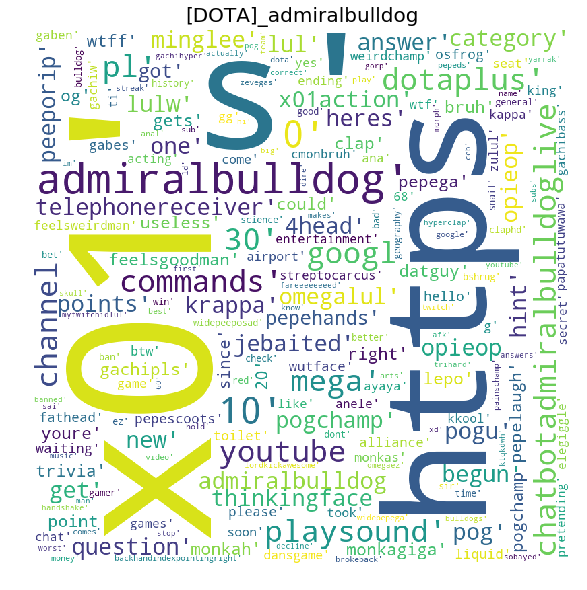

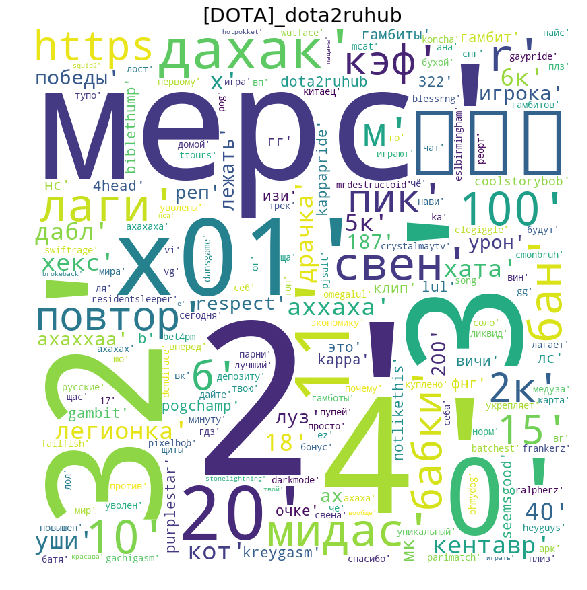

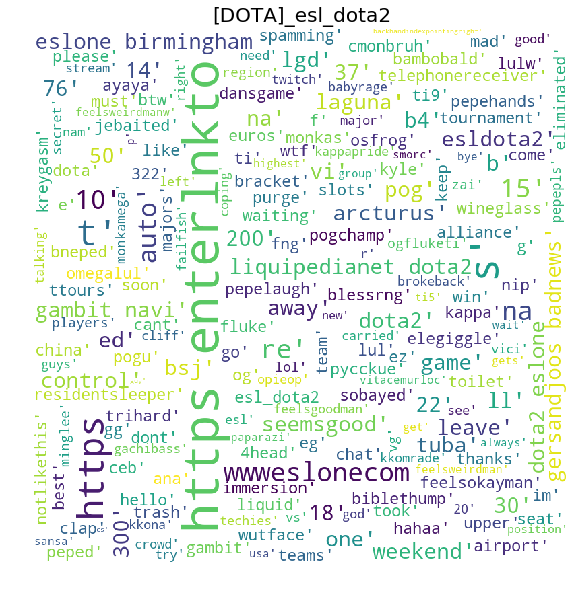

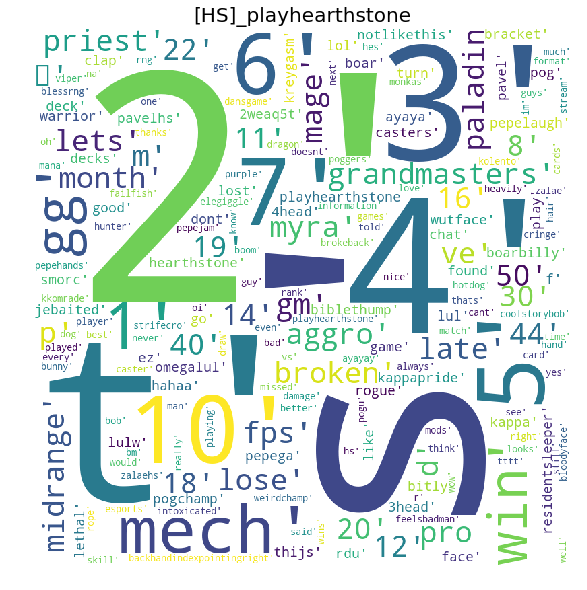

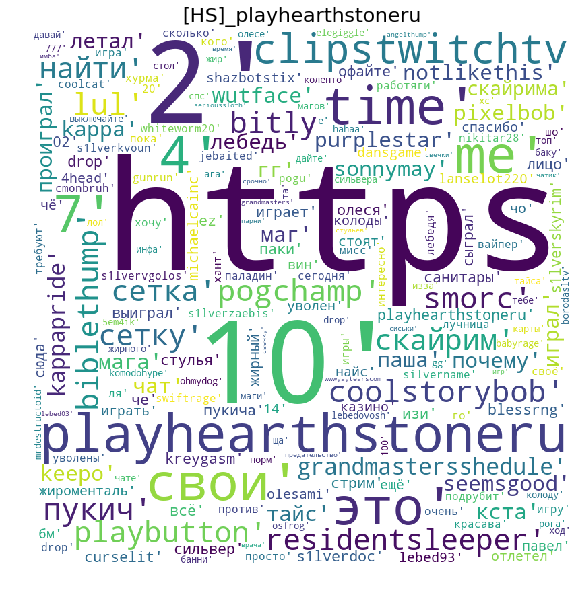

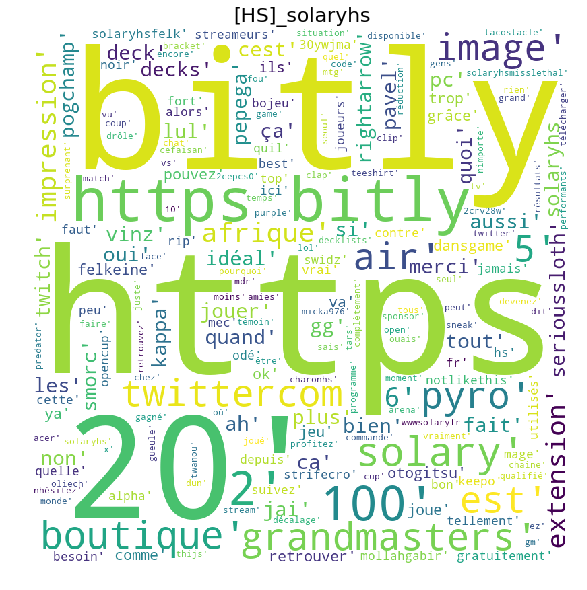

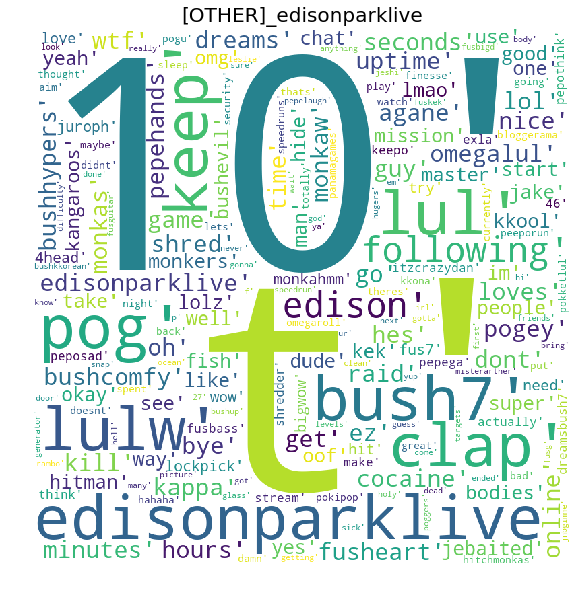

In [124]:
#runs the word cloud for each channel

for i in range(len(channels)):
    generate_word_cloud('['+game_type[i]+']_'+channels[i], word_count_list[i])

### 2. Chat Frequency by Channel

In [125]:
df_count = df.groupby('channel').count()['timestamp']
df_count

channel
admiralbulldog       10777
dota2ruhub           18433
edisonparklive        1680
esl_dota2            30838
playhearthstone      16464
playhearthstoneru     3390
solaryhs              2180
Name: timestamp, dtype: int64

In [126]:
df_count.tolist()

[10777, 18433, 1680, 30838, 16464, 3390, 2180]

#### Create bar chart

Need to seperate out the channels by game type for the plot

In [127]:
dota2 = df[df['game']=='DOTA'].groupby(['game']) #applies a mask of 'DOTA' to the df
dota2_channels = list(dota2.channel.unique()[0])

hs = df[df['game']=='HS'].groupby(['game']) #applies a mask of 'DOTA' to the df
hs_channels = list(hs.channel.unique()[0])

other = df[df['game']=='OTHER'].groupby(['game']) #applies a mask of 'DOTA' to the df
other = list(other.channel.unique()[0])

getting the y values by channel

In [128]:
dota2_y = df[df['game']=='DOTA'].groupby('channel').count()['timestamp'].tolist()
hs_y = df[df['game']=='HS'].groupby('channel').count()['timestamp'].tolist()
other_y = df[df['game']=='OTHER'].groupby('channel').count()['timestamp'].tolist()

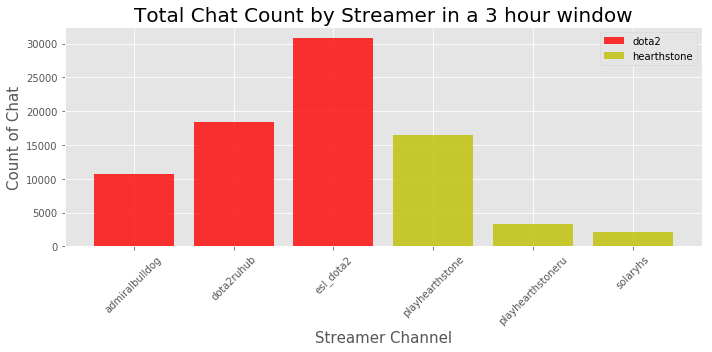

In [130]:
plt.figure(figsize=(10,5))
plt.bar(dota2_channels, dota2_y, alpha=0.8, color='r', label = 'dota2')
plt.bar(hs_channels, hs_y, alpha=0.8, color='y', label = 'hearthstone')
# plt.bar(other, other_y, alpha=0.8, color='grey', label = 'other gaming')
plt.title('Total Chat Count by Streamer in a 3 hour window', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Count of Chat', fontsize=15)
plt.xlabel('Streamer Channel', fontsize=15)
plt.tight_layout()
plt.legend()
image_filepath = cwd[:-3]+'images/'
plt.savefig(image_filepath+'bar_chat_count.png', format='png', dpi=500)

### Begin EDA on Twitch Chat Metadata

In [131]:
metafile_list = []

import os
for file in os.listdir(folder):
    if file.endswith(".txt"):
        metafile_list.append(file)
        
metafile_list

['HS_playhearthstoneru_stream_metadata.txt',
 'HS_playhearthstone_stream_metadata.txt',
 'OTHER_edisonparklive_stream_metadata.txt',
 'DOTA_admiralbulldog_stream_metadata.txt',
 'HS_solaryhs_stream_metadata.txt',
 'DOTA_esl_dota2_stream_metadata.txt',
 'DOTA_dota2ruhub_stream_metadata.txt']

### Steamer Channel Metadata Dataframe

#### Function call

In [132]:
 def create_meta_df(mf_list, folder):
    '''
    takes a list of a steamer's chat metadata text files, returns a dataframe of that channel name from the log file
    
    Parameters
    ----------
    mf_list: list (list of text file names)
        must also have an accompany log file in the chat_data_log folder

    Returns
    -------
    pandas dataframe
    '''
    
    line_counter = 1
    
    print("creating meta_df...\n")
    meta_df = pd.DataFrame(columns=['game', 'channel', 'timestamp', 'viewer_count']) #initializes the dataframe
    
    for file in mf_list:
        
        game_type = file[:file.index('_')] #extracts game type
        channel = file[file.index('_')+1:-20] #extracts channel name
        
        print("inserting chat data for: ", channel)
        chat_log_file = folder+"/"+file
    
        with open(chat_log_file, "r") as f:
            for line in f:
                timestamp = datetime.datetime.strptime(line[:26].replace('T',' '),'%Y-%m-%d %H:%M:%S.%f') #2019-05-31T09:55:32.815211
                timestamp = roundTime(timestamp, roundTo=60)
#                 print(timestamp, type(timestamp))
                json = line[26:]
                json_view_count_start = json[json.find('viewer_count')-1+16:]
                json_view_helper = json_view_count_start.find(',')
                viewer_count = int(json_view_count_start[:json_view_helper])
#                 print(viewer_count)
                
                meta_df.loc[line_counter] = (game_type, channel, timestamp, viewer_count)
                line_counter += 1 #line counter
                
    print("\n...meta_df created.")    
    return meta_df

In [133]:
# # problem due to datetime.datetime in the json

# import ast

# x = str({'a':1, 'b':2})
# y = "{'id': '34348315856', 'user_id': '189752674', 'user_name': 'PlayHearthstoneRU', 'game_id': '138585', 'community_ids': [], 'type': 'live', 'title': '[RU] Hearthstone Grandmasters Europe - Week 3 Day 1 @ LEBED & Olesami', 'viewer_count': 4720, 'started_at': datetime.datetime(2019, 5, 31, 14, 26, 17), 'language': 'ru', 'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_playhearthstoneru-{width}x{height}.jpg', 'tag_ids': ['0569b171-2a2b-476e-a596-5bdfb45a1327', 'f8d72838-f2c2-4b99-9a59-221174f6169d']}"

# print(y)
# type(ast.literal_eval(y))

#### Create channel metadata dataframe

In [134]:
meta_df = create_meta_df(metafile_list, folder)
meta_df.head()

creating meta_df...

inserting chat data for:  playhearthstoneru
inserting chat data for:  playhearthstone
inserting chat data for:  edisonparklive
inserting chat data for:  admiralbulldog
inserting chat data for:  solaryhs
inserting chat data for:  esl_dota2
inserting chat data for:  dota2ruhub

...meta_df created.


game            channel           timestamp viewer_count
1   HS  playhearthstoneru 2019-05-31 09:56:00         4720
2   HS  playhearthstoneru 2019-05-31 09:57:00         4776
3   HS  playhearthstoneru 2019-05-31 09:58:00         4825
4   HS  playhearthstoneru 2019-05-31 09:59:00         4936
5   HS  playhearthstoneru 2019-05-31 10:00:00         5089

### Pickling Meta DF

In [135]:
meta_df.to_pickle("twitch_meta_df.pkl")

In [136]:
meta_df = pd.read_pickle("twitch_meta_df.pkl")

### Plotting Viewer Count v Top 5 Word Count Frequency

In [ ]:
#scatterplot
#x = number of viewers
#y = top 5 frequency word count (take it by 1min interval)

Create scatter plot for Dota / Admiral bulldog on viewer v. word count

In [138]:
#viewer_count

admiralbulldog_meta_df = meta_df[meta_df['channel']=='admiralbulldog']

admiralbulldog_meta_df.head()

game         channel           timestamp viewer_count
556  DOTA  admiralbulldog 2019-05-31 09:48:00         6429
557  DOTA  admiralbulldog 2019-05-31 09:49:00         6515
558  DOTA  admiralbulldog 2019-05-31 09:50:00         6570
559  DOTA  admiralbulldog 2019-05-31 09:51:00         6481
560  DOTA  admiralbulldog 2019-05-31 09:52:00         6485

In [141]:
#list of timestamps

admiralbulldog_time_stamp_list = admiralbulldog_meta_df['timestamp'].tolist()

admiralbulldog_time_stamp_list[:5]

[Timestamp('2019-05-31 09:48:00'),
 Timestamp('2019-05-31 09:49:00'),
 Timestamp('2019-05-31 09:50:00'),
 Timestamp('2019-05-31 09:51:00'),
 Timestamp('2019-05-31 09:52:00')]

In [143]:
# pd.set_option('display.max_rows', 500)

# create admiralbulldog df

folder='../chat_log_data/admiralbulldog_analysis'
admiralbulldog_df = create_chat_df(folder)#.sort_values(by = ['game', 'channel', 'timestamp']).reset_index()
admiralbulldog_df.head()

generating... list of .log files

creating df...

inserting chat data for:  DOTA admiralbulldog
2 timestamp error... :gorgeous_calf!gorgeous_calf@gorgeous_calf.tmi.twitch.tv PRIVMSG #admiralbulldog :GachiW SELLING GIFT FROM WEEBS IS ACCEPTABLE

3 timestamp error... :dreamwalkerdota!dreamwalkerdota@dreamwalkerdota.tmi.twitch.tv PRIVMSG #admiralbulldog :Krappa

4 timestamp error... :amsar2285!amsar2285@amsar2285.tmi.twitch.tv PRIVMSG #admiralbulldog :HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp

5 timestamp error... :jiisokyun!jiisokyun@jiisokyun.tmi.twitch.tv PRIVMSG #admiralbulldog :Krappa

6 timestamp error... :vi195!vi195@vi195.tmi.twitch.tv PRIVMSG #admiralbulldog :SELLING OFFSTREAM LULW

7 timestamp error... :le2yo!le2yo@le2yo.tmi.twitch.tv PRIVMSG #admiralbulldog :HAHAHAHA

8 timestamp error... :ales_!ales_@ales_

3127 timestamp error... :abrthefreshprince!abrthefreshprince@abrthefreshprince.tmi.twitch.tv PRIVMSG #admiralbulldog ::telephone_receiver: 4Head HELLO OG :telephone_receiver: 4Head LIQUID HERE :telephone_receiver: 4Head WE'RE WAITING AT AIRPORT :telephone_receiver: 4Head PLEASE COME SOON :telephone_receiver: 4Head ALLIANCE TOOK TOILET SEAT BTW :telephone_receiver: 4Head

3257 timestamp error... :realyumeina!realyumeina@realyumeina.tmi.twitch.tv PRIVMSG #admiralbulldog :OSfrog

3331 timestamp error... :jimmydorry!jimmydorry@jimmydorry.tmi.twitch.tv PRIVMSG #admiralbulldog ::telephone_receiver: 4Head HELLO OG :telephone_receiver: 4Head LIQUID HERE :telephone_receiver: 4Head WE'RE WAITING AT AIRPORT :telephone_receiver: 4Head PLEASE COME SOON :telephone_receiver: 4Head ALLIANCE TOOK TOILET SEAT BTW :telephone_receiver: 4Head

3594 timestamp error... :kappafangay97!kappafangay97@kappafangay97.tmi.twitch.tv PRIVMSG #admiralbulldog :PepeScoots SPEAR OF?

3774 timestamp error... :mattoszepedr

7944 timestamp error... :itsinthegab!itsinthegab@itsinthegab.tmi.twitch.tv PRIVMSG #admiralbulldog :@AdmiralBulldog great acting sir :)

7951 timestamp error... :necromancer_coffee!necromancer_coffee@necromancer_coffee.tmi.twitch.tv PRIVMSG #admiralbulldog :Jebaited ClapHD

7989 timestamp error... :jt1do!jt1do@jt1do.tmi.twitch.tv PRIVMSG #admiralbulldog :NotLikeThis

8281 timestamp error... :thomas__!thomas__@thomas__.tmi.twitch.tv PRIVMSG #admiralbulldog :!points

8806 timestamp error... :rafuuk!rafuuk@rafuuk.tmi.twitch.tv PRIVMSG #admiralbulldog :Britney LUL

8831 timestamp error... :geedoggy!geedoggy@geedoggy.tmi.twitch.tv PRIVMSG #admiralbulldog :george w bush

8884 timestamp error... :fareeeeeeeed!fareeeeeeeed@fareeeeeeeed.tmi.twitch.tv PRIVMSG #admiralbulldog :liver

8892 timestamp error... :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION fareeeeeeeed got the answer right! The answer was Poseidon FeelsGoodMan They get 20 points! PogCham

game         channel           timestamp     user_name  \
0   DOTA  admiralbulldog 2019-05-31 09:48:00      cy_dota2   
1   DOTA  admiralbulldog 2019-05-31 09:48:00       asavell   
24  DOTA  admiralbulldog 2019-05-31 09:48:00      gandor87   
25  DOTA  admiralbulldog 2019-05-31 09:48:00    nobody1564   
26  DOTA  admiralbulldog 2019-05-31 09:48:00  not_that_guy   

                                             chat_msg  
0                                              Krappa  
1                                        ON STREAM :)  
24                         WHY IS IT PAUSED PepeHands  
25                                               LULW  
26  @AdmiralBulldog what is the site where you can...

In [ ]:
admiralbulldog_df

In [145]:
#remove bot user who was spamming

admiralbulldog_df = admiralbulldog_df[admiralbulldog_df['user_name'] != 'admiralbullbot']

admiralbulldog_df.head()

game         channel           timestamp     user_name  \
0   DOTA  admiralbulldog 2019-05-31 09:48:00      cy_dota2   
1   DOTA  admiralbulldog 2019-05-31 09:48:00       asavell   
24  DOTA  admiralbulldog 2019-05-31 09:48:00      gandor87   
25  DOTA  admiralbulldog 2019-05-31 09:48:00    nobody1564   
26  DOTA  admiralbulldog 2019-05-31 09:48:00  not_that_guy   

                                             chat_msg  
0                                              Krappa  
1                                        ON STREAM :)  
24                         WHY IS IT PAUSED PepeHands  
25                                               LULW  
26  @AdmiralBulldog what is the site where you can...

## Chat Frequency over Time

Plotting frequency of chat messages for admiralbulldog's channel

In [ ]:
#admiralbulldog's channel ended at 10:36AM that day so there was only ~1 hour of chat data
#he was also streaming a highly anticipated competition which may cause abnormal chat behavior compared to his regular streams

In [214]:
# admiralbulldog_df['timestamp'][0]

In [225]:
#admiralbulldog df shorted from 9:48 to 10:36 (when I started tracking his stream to when he stopped streaming)

admiralbulldog_df_1036 = admiralbulldog_df.set_index('timestamp').between_time('09:48','10:36').reset_index()

# pd.set_option('display.max_rows', 9000)
# admiralbulldog_df_1036

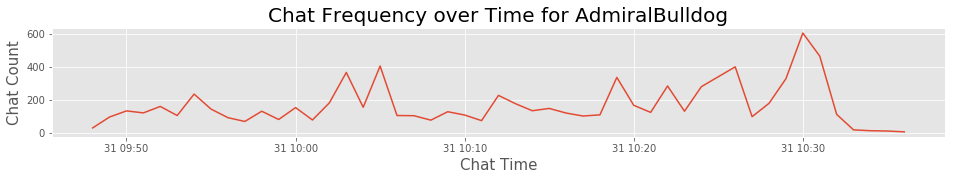

In [218]:
x = admiralbulldog_df_1036.groupby(['timestamp']).count().index
y = admiralbulldog_df_1036.groupby(['timestamp']).count()['chat_msg']

fig, ax = plt.subplots(figsize = (16,2))
ax.plot(x, y)
ax.set_title("Chat Frequency over Time for AdmiralBulldog", size = 20)
plt.xlabel('Chat Time', size = 15)
plt.ylabel('Chat Count', size = 15)

image_filepath = cwd[:-3]+'images/'
plt.savefig(image_filepath+'admiralbulldog_chat_frequency.png', format='png', dpi=500)

Text(0, 0.5, 'Viewer Count')

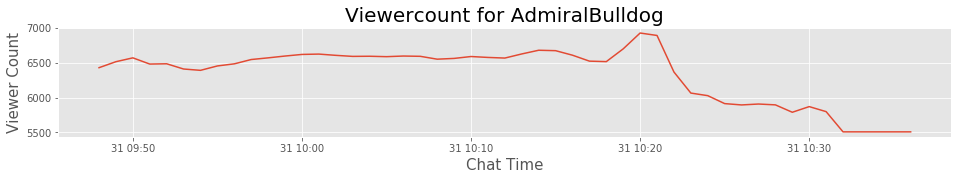

In [223]:
x = meta_df[meta_df['channel']=='admiralbulldog']['timestamp']
y = meta_df[meta_df['channel']=='admiralbulldog']['viewer_count']

fig, ax = plt.subplots(figsize = (16,2))
ax.plot(x, y)
ax.set_title("Viewercount for AdmiralBulldog", size = 20)
plt.xlabel('Chat Time', size = 15)
plt.ylabel('Viewer Count', size = 15)

# image_filepath = cwd[:-3]+'images/'
# plt.savefig(image_filepath+'admiralbulldog_chat_frequency.png', format='png', dpi=500)

### Looks like Admiralbulldog's channel session ended around 10:30, will repeat this analysis on channel 'playhearthstone'

In [228]:
folder='../chat_log_data/playhearthstone'
playhearthstone_df = create_chat_df(folder)#.sort_values(by = ['game', 'channel', 'timestamp']).reset_index()
playhearthstone_df.head()

generating... list of .log files

creating df...

inserting chat data for:  HS playhearthstone
178 timestamp error... :irainylives!irainylives@irainylives.tmi.twitch.tv PRIVMSG #playhearthstone :omg gg

236 timestamp error... :radicalmeno1!radicalmeno1@radicalmeno1.tmi.twitch.tv PRIVMSG #playhearthstone :SMOrc

283 timestamp error... :elmertagra!elmertagra@elmertagra.tmi.twitch.tv PRIVMSG #playhearthstone :why not spellbender ? :(

314 timestamp error... :elf_yamada!elf_yamada@elf_yamada.tmi.twitch.tv PRIVMSG #playhearthstone :eSports ready LUL

434 timestamp error... :bodoka6!bodoka6@bodoka6.tmi.twitch.tv PRIVMSG #playhearthstone :STILL turn 5 giant wins

435 timestamp error... :muzibal!muzibal@muzibal.tmi.twitch.tv PRIVMSG #playhearthstone :y

473 timestamp error... :knownastherat!knownastherat@knownastherat.tmi.twitch.tv PRIVMSG #playhearthstone :he does not know Pavel's hand

757 timestamp error... :snailpie!snailpie@snailpie.tmi.twitch.tv PRIVMSG #playhearthstone :@Pavel_HS Too ba

7645 timestamp error... :toastmold!toastmold@toastmold.tmi.twitch.tv PRIVMSG #playhearthstone :won

7711 timestamp error... :twongalong!twongalong@twongalong.tmi.twitch.tv PRIVMSG #playhearthstone :!DECK

7802 timestamp error... :citrus1990!citrus1990@citrus1990.tmi.twitch.tv PRIVMSG #playhearthstone :3head

7934 timestamp error... :thatsnasty!thatsnasty@thatsnasty.tmi.twitch.tv PRIVMSG #playhearthstone :3Head

8023 timestamp error... :chief_tony!chief_tony@chief_tony.tmi.twitch.tv PRIVMSG #playhearthstone :@Thijs PepeHands

8115 timestamp error... :behzark!behzark@behzark.tmi.twitch.tv PRIVMSG #playhearthstone :CorgiDerp CorgiDerp CorgiDerp CorgiDerp OhMyDog OhMyDog OhMyDog OhMyDog

8118 timestamp error... :inconnuaubataillon1208!inconnuaubataillon1208@inconnuaubataillon1208.tmi.twitch.tv PRIVMSG #playhearthstone :boarBilly boarBilly boarBilly <3 <3

8127 timestamp error... :waddap55!waddap55@waddap55.tmi.twitch.tv PRIVMSG #playhearthstone :CoolCat

8163 timestamp error... :damnbringe

14203 timestamp error... :digdog303!digdog303@digdog303.tmi.twitch.tv PRIVMSG #playhearthstone :@disobedient_ you'd prefer silence while we wait for the rope?

14217 timestamp error... :akshayhp1234!akshayhp1234@akshayhp1234.tmi.twitch.tv PRIVMSG #playhearthstone :when does dog play?

14229 timestamp error... :nuclear__hs!nuclear__hs@nuclear__hs.tmi.twitch.tv PRIVMSG #playhearthstone :!bracket

14358 timestamp error... :goatthulu!goatthulu@goatthulu.tmi.twitch.tv PRIVMSG #playhearthstone :korkron evis gogogogo

14536 timestamp error... :nelsoned99!nelsoned99@nelsoned99.tmi.twitch.tv PRIVMSG #playhearthstone :SMOrc .

14556 timestamp error... :prophetflume!prophetflume@prophetflume.tmi.twitch.tv PRIVMSG #playhearthstone :pepehands

14635 timestamp error... :iryx90!iryx90@iryx90.tmi.twitch.tv PRIVMSG #playhearthstone :4 BOOMS

14658 timestamp error... :the_star_king!the_star_king@the_star_king.tmi.twitch.tv PRIVMSG #playhearthstone :@brianlaudrup87 you were saying?

14668 timestamp error

game          channel           timestamp         user_name  \
0   HS  playhearthstone 2019-05-31 09:55:00   gaynoobmaster69   
1   HS  playhearthstone 2019-05-31 09:55:00  thefirstvanguard   
2   HS  playhearthstone 2019-05-31 09:55:00        younesboy7   
3   HS  playhearthstone 2019-05-31 09:55:00          alex_034   
4   HS  playhearthstone 2019-05-31 09:55:00      na_me_le_ss_   

                     chat_msg  
0    admirable sounds not man  
1  2 mana mana wyrm PepeLaugh  
2      @Farmess ok thanks man  
3                          ??  
4            METOR FACE SMOrc

In [232]:
playhearthstone_df = playhearthstone_df.set_index('timestamp').between_time('09:55','16:10').reset_index()
playhearthstone_df

timestamp game          channel                  user_name  \
0     2019-05-31 09:55:00   HS  playhearthstone            gaynoobmaster69   
1     2019-05-31 09:55:00   HS  playhearthstone           thefirstvanguard   
2     2019-05-31 09:55:00   HS  playhearthstone                 younesboy7   
3     2019-05-31 09:55:00   HS  playhearthstone                   alex_034   
4     2019-05-31 09:55:00   HS  playhearthstone               na_me_le_ss_   
5     2019-05-31 09:55:00   HS  playhearthstone                 vayazu7285   
6     2019-05-31 09:55:00   HS  playhearthstone                    krizard   
7     2019-05-31 09:55:00   HS  playhearthstone            dies_to_removal   
8     2019-05-31 09:55:00   HS  playhearthstone                   kentymp1   
9     2019-05-31 09:55:00   HS  playhearthstone               joaagussanti   
10    2019-05-31 09:55:00   HS  playhearthstone                  voxtertia   
11    2019-05-31 09:55:00   HS  playhearthstone   the_sheriff_of_rockridge   
12    2019-05-31 09:55:00   HS  playhearthstone            streamer_falido   
13    2019-05-31 09:56:00   HS  playhearthstone                    west4u2   
14    2019-05-31 09:56:00   HS  playhearthstone            gaynoobmaster69   
15    2019-05-31 09:56:00   HS  playhearthstone               kappa_keeppo   
16    2019-05-31 09:56:00   HS  playhearthstone                    s1llenz   
17    2019-05-31 09:56:00   HS  playhearthstone                    yaxeeyx   
18    2019-05-31 09:56:00   HS  playhearthstone                nipsterious   
19    2019-05-31 09:56:00   HS  playhearthstone                    bodoka6   
20    2019-05-31 09:56:00   HS  playhearthstone             girlsday_world   
21    2019-05-31 09:56:00   HS  playhearthstone                     vodrin   
22    2019-05-31 09:56:00   HS  playhearthstone                  luisf25xx   
23    2019-05-31 09:56:00   HS  playhearthstone                     moobot   
24    2019-05-31 09:56:00   HS  playhearthstone                   slayz777   
25    2019-05-31 09:56:00   HS  playhearthstone              tiberiussmith   
26    2019-05-31 09:56:00   HS  playhearthstone                  mrfourg24   
27    2019-05-31 09:56:00   HS  playhearthstone                redtail0406   
28    2019-05-31 09:56:00   HS  playhearthstone                  madmax966   
29    2019-05-31 09:56:00   HS  playhearthstone             insanepathetic   
30    2019-05-31 09:56:00   HS  playhearthstone                haudraufund   
31    2019-05-31 09:56:00   HS  playhearthstone                      f7uff   
32    2019-05-31 09:56:00   HS  playhearthstone                     imkl0u   
33    2019-05-31 09:56:00   HS  playhearthstone               thewayitg0es   
34    2019-05-31 09:56:00   HS  playhearthstone                   layelife   
35    2019-05-31 09:56:00   HS  playhearthstone               shadowprides   
36    2019-05-31 09:56:00   HS  playhearthstone                     imkl0u   
37    2019-05-31 09:56:00   HS  playhearthstone                    west4u2   
38    2019-05-31 09:56:00   HS  playhearthstone                      f7uff   
39    2019-05-31 09:56:00   HS  playhearthstone                     tdh_95   
40    2019-05-31 09:56:00   HS  playhearthstone                 leftervlad   
41    2019-05-31 09:56:00   HS  playhearthstone               na_me_le_ss_   
42    2019-05-31 09:56:00   HS  playhearthstone                  226622460   
43    2019-05-31 09:56:00   HS  playhearthstone            thunder_nuggets   
44    2019-05-31 09:56:00   HS  playhearthstone                  heart_4_x   
45    2019-05-31 09:56:00   HS  playhearthstone                     deriza   
46    2019-05-31 09:56:00   HS  playhearthstone                  pryanik20   
47    2019-05-31 09:56:00   HS  playhearthstone              tiberiussmith   
48    2019-05-31 09:56:00   HS  playhearthstone                monkasmonka   
49    2019-05-31 09:56:00   HS  playhearthstone                 vayazu7285   
50    2019-05-31 09:56:00   HS  playhe

Text(0, 0.5, 'Chat Count')

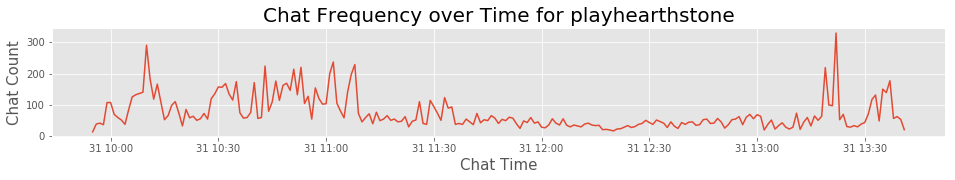

In [231]:
x = playhearthstone_df.groupby(['timestamp']).count().index
y = playhearthstone_df.groupby(['timestamp']).count()['chat_msg']

fig, ax = plt.subplots(figsize = (16,2))
ax.plot(x, y)
ax.set_title("Chat Frequency over Time for playhearthstone", size = 20)
plt.xlabel('Chat Time', size = 15)
plt.ylabel('Chat Count', size = 15)

# image_filepath = cwd[:-3]+'images/'
# plt.savefig(image_filepath+'admiralbulldog_chat_frequency.png', format='png', dpi=500)

Text(0, 0.5, 'Viewer Count')

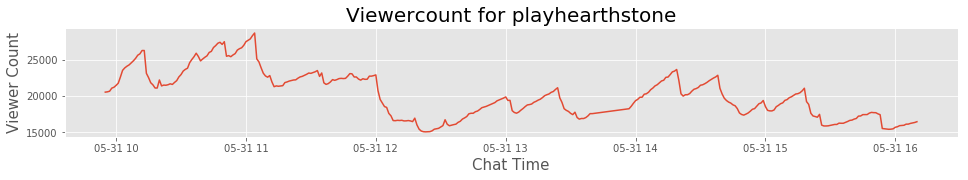

In [222]:
x = meta_df[meta_df['channel']=='playhearthstone']['timestamp']
y = meta_df[meta_df['channel']=='playhearthstone']['viewer_count']

fig, ax = plt.subplots(figsize = (16,2))
ax.plot(x, y)
ax.set_title("Viewercount for playhearthstone", size = 20)
plt.xlabel('Chat Time', size = 15)
plt.ylabel('Viewer Count', size = 15)

# image_filepath = cwd[:-3]+'images/'
# plt.savefig(image_filepath+'admiralbulldog_chat_frequency.png', format='png', dpi=500)

In [224]:
meta_df[meta_df['channel']=='playhearthstone']

game          channel           timestamp viewer_count
130   HS  playhearthstone 2019-05-31 09:55:00        20537
131   HS  playhearthstone 2019-05-31 09:56:00        20577
132   HS  playhearthstone 2019-05-31 09:57:00        20662
133   HS  playhearthstone 2019-05-31 09:58:00        21083
134   HS  playhearthstone 2019-05-31 09:59:00        21206
135   HS  playhearthstone 2019-05-31 10:00:00        21463
136   HS  playhearthstone 2019-05-31 10:01:00        21767
137   HS  playhearthstone 2019-05-31 10:02:00        22620
138   HS  playhearthstone 2019-05-31 10:03:00        23528
139   HS  playhearthstone 2019-05-31 10:04:00        23859
140   HS  playhearthstone 2019-05-31 10:05:00        24090
141   HS  playhearthstone 2019-05-31 10:06:00        24271
142   HS  playhearthstone 2019-05-31 10:07:00        24561
143   HS  playhearthstone 2019-05-31 10:08:00        24834
144   HS  playhearthstone 2019-05-31 10:09:00        25170
145   HS  playhearthstone 2019-05-31 10:10:00        25600
146   HS  playhearthstone 2019-05-31 10:11:00        25790
147   HS  playhearthstone 2019-05-31 10:12:00        26245
148   HS  playhearthstone 2019-05-31 10:13:00        26245
149   HS  playhearthstone 2019-05-31 10:14:00        23114
150   HS  playhearthstone 2019-05-31 10:15:00        22526
151   HS  playhearthstone 2019-05-31 10:16:00        21822
152   HS  playhearthstone 2019-05-31 10:17:00        21539
153   HS  playhearthstone 2019-05-31 10:18:00        21101
154   HS  playhearthstone 2019-05-31 10:19:00        21101
155   HS  playhearthstone 2019-05-31 10:20:00        22204
156   HS  playhearthstone 2019-05-31 10:21:00        21392
157   HS  playhearthstone 2019-05-31 10:22:00        21503
158   HS  playhearthstone 2019-05-31 10:23:00        21481
159   HS  playhearthstone 2019-05-31 10:24:00        21551
160   HS  playhearthstone 2019-05-31 10:25:00        21679
161   HS  playhearthstone 2019-05-31 10:26:00        21592
162   HS  playhearthstone 2019-05-31 10:27:00        21868
163   HS  playhearthstone 2019-05-31 10:28:00        22113
164   HS  playhearthstone 2019-05-31 10:29:00        22621
165   HS  playhearthstone 2019-05-31 10:30:00        22944
166   HS  playhearthstone 2019-05-31 10:31:00        23425
167   HS  playhearthstone 2019-05-31 10:32:00        23660
168   HS  playhearthstone 2019-05-31 10:33:00        23819
169   HS  playhearthstone 2019-05-31 10:34:00        24580
170   HS  playhearthstone 2019-05-31 10:35:00        25017
171   HS  playhearthstone 2019-05-31 10:36:00        25397
172   HS  playhearthstone 2019-05-31 10:37:00        25874
173   HS  playhearthstone 2019-05-31 10:38:00        25429
174   HS  playhearthstone 2019-05-31 10:39:00        24821
175   HS  playhearthstone 2019-05-31 10:40:00        25079
176   HS  playhearthstone 2019-05-31 10:41:00        25316
177   HS  playhearthstone 2019-05-31 10:42:00        25517
178   HS  playhearthstone 2019-05-31 10:43:00        25977
179   HS  playhearthstone 2019-05-31 10:44:00        26131
180   HS  playhearthstone 2019-05-31 10:45:00        26656
181   HS  playhearthstone 2019-05-31 10:46:00        26917
182   HS  playhearthstone 2019-05-31 10:47:00        27243
183   HS  playhearthstone 2019-05-31 10:48:00        27372
184   HS  playhearthstone 2019-05-31 10:49:00        27081
185   HS  playhearthstone 2019-05-31 10:50:00        27455
186   HS  playhearthstone 2019-05-31 10:51:00        25458
187   HS  playhearthstone 2019-05-31 10:52:00        25544
188   HS  playhearthstone 2019-05-31 10:53:00        25397
189   HS  playhearthstone 2019-05-31 10:54:00        25633
190   HS  playhearthstone 2019-05-31 10:55:00        25820
191   HS  playhearthstone 2019-05-31 10:56:00        26298
192   HS  playhearthstone 2019-05-31 10:57:00        26495
193   HS  playhearthstone 2019-05-31 10:58:00        26621
194   HS  playhearthstone 2019-05-31 10:59:00        26964
195   HS  playhearthstone 2019-05-31 11:00:00        27459
196   HS  playhearthstone 2019-05-31 11:01:00      

## Top 5 Words by Channel

Looking at the top 5 words and it's impact on the channel

In [146]:
#top 5 words for admiral bulldog

channels = ['admiralbulldog']

admiral_top5 = generate_word_count_list(admiralbulldog_df, channels)[0][1][:5]

admiral_top5_words = []

for d in admiral_top5:
    admiral_top5_words.append(d[0])

print(admiral_top5)
admiral_top5_words

[('jebaited', 1474), ('lulw', 842), ('4head', 651), ('telephonereceiver', 569), ('krappa', 555)]


['jebaited', 'lulw', '4head', 'telephonereceiver', 'krappa']

In [692]:
# #create timestamp index in df

# admiralbulldog_timestamp_df = admiralbulldog_df.set_index('timestamp')
# admiralbulldog_timestamp_df

In [147]:
#joins the text by timestamp

#this may cause duplicates for one post with the same word twice, but the frequency of this happening is < 1%

admiralbulldog_chat_by_timestamp_df = admiralbulldog_df.groupby('timestamp')

admiralbulldog_chat_by_timestamp_df2 = admiralbulldog_chat_by_timestamp_df['chat_msg'].apply(','.join).reset_index()

admiralbulldog_chat_by_timestamp_df2.head()

timestamp                                           chat_msg
0 2019-05-31 09:48:00  Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...
1 2019-05-31 09:49:00  Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...
2 2019-05-31 09:50:00  If you truly like me chat, you'd give me some ...
3 2019-05-31 09:51:00  missed one tho,D:,WutFace WutFace WutFace WutF...
4 2019-05-31 09:52:00  OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...

In [148]:
admiralbulldog_chat_by_timestamp_df

In [149]:
#creates word_count collection on chat_msg

from collections import Counter

admiralbulldog_chat_by_timestamp_df2['word_count'] = admiralbulldog_chat_by_timestamp_df2['chat_msg'].apply(lambda x: Counter(x.lower().replace(","," ").split(' ')))

In [150]:
admiralbulldog_chat_by_timestamp_df2.head()

timestamp                                           chat_msg  \
0 2019-05-31 09:48:00  Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...   
1 2019-05-31 09:49:00  Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...   
2 2019-05-31 09:50:00  If you truly like me chat, you'd give me some ...   
3 2019-05-31 09:51:00  missed one tho,D:,WutFace WutFace WutFace WutF...   
4 2019-05-31 09:52:00  OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...   

                                          word_count  
0  {'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...  
1  {'krappa': 18, 'other': 2, 'balancelot!!': 1, ...  
2  {'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...  
3  {'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...  
4  {'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...

In [167]:
admiralbulldog_chat_by_timestamp_df2['timestamp'][0]

Timestamp('2019-05-31 09:48:00')

In [151]:
#creates a msg_count per timestamp based on word_count

admiralbulldog_chat_by_timestamp_df2['msg_count'] = admiralbulldog_chat_by_timestamp_df2['word_count'].apply(lambda x: sum(x.values()))

In [152]:
admiralbulldog_chat_by_timestamp_df2.head()

timestamp                                           chat_msg  \
0 2019-05-31 09:48:00  Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...   
1 2019-05-31 09:49:00  Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...   
2 2019-05-31 09:50:00  If you truly like me chat, you'd give me some ...   
3 2019-05-31 09:51:00  missed one tho,D:,WutFace WutFace WutFace WutF...   
4 2019-05-31 09:52:00  OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...   

                                          word_count  msg_count  
0  {'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...         63  
1  {'krappa': 18, 'other': 2, 'balancelot!!': 1, ...        280  
2  {'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...        368  
3  {'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...        243  
4  {'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...        383

In [153]:
#creates two additional columsn in the df
#1. helper function 'top_5_words' - creates a new dictionary that consists of the top 5 words among all words of the channel
#2. sums the value of the helper function

top5_words = admiral_top5_words

# admiralbulldog_chat_by_timestamp_df2['top_5_words'] = admiralbulldog_chat_by_timestamp_df2['word_count'].apply(lambda x: {k: x[k] for k in top5_words})

def new_dict(d, top_5):
    return {k: d.get(k,0) for k in top_5}

admiralbulldog_chat_by_timestamp_df2['top_5_words'] = admiralbulldog_chat_by_timestamp_df2['word_count'].apply(lambda x: new_dict(dict(x), top5_words))

In [154]:
admiralbulldog_chat_by_timestamp_df2.head()

timestamp                                           chat_msg  \
0 2019-05-31 09:48:00  Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...   
1 2019-05-31 09:49:00  Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...   
2 2019-05-31 09:50:00  If you truly like me chat, you'd give me some ...   
3 2019-05-31 09:51:00  missed one tho,D:,WutFace WutFace WutFace WutF...   
4 2019-05-31 09:52:00  OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...   

                                          word_count  msg_count  \
0  {'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...         63   
1  {'krappa': 18, 'other': 2, 'balancelot!!': 1, ...        280   
2  {'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...        368   
3  {'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...        243   
4  {'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...        383   

                                         top_5_words  
0  {'jebaited': 0, 'lulw': 3, '4head': 0, 'teleph...  
1  {'jebaited': 0, 'lulw': 20, '4head': 0, 'telep...  
2  {'jebaited': 0, 'lulw': 8, '4head': 0, 'teleph...  
3  {'jebaited': 0, 'lulw': 9, '4head': 8, 'teleph...  
4  {'jebaited': 0, 'lulw': 10, '4head': 0, 'telep...

In [155]:
admiralbulldog_chat_by_timestamp_df2['top5_count'] = admiralbulldog_chat_by_timestamp_df2['top_5_words'].apply(lambda x: sum(x.values()))

In [156]:
admiralbulldog_chat_by_timestamp_df2.head()

timestamp                                           chat_msg  \
0 2019-05-31 09:48:00  Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...   
1 2019-05-31 09:49:00  Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...   
2 2019-05-31 09:50:00  If you truly like me chat, you'd give me some ...   
3 2019-05-31 09:51:00  missed one tho,D:,WutFace WutFace WutFace WutF...   
4 2019-05-31 09:52:00  OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...   

                                          word_count  msg_count  \
0  {'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...         63   
1  {'krappa': 18, 'other': 2, 'balancelot!!': 1, ...        280   
2  {'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...        368   
3  {'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...        243   
4  {'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...        383   

                                         top_5_words  top5_count  
0  {'jebaited': 0, 'lulw': 3, '4head': 0, 'teleph...           9  
1  {'jebaited': 0, 'lulw': 20, '4head': 0, 'telep...          38  
2  {'jebaited': 0, 'lulw': 8, '4head': 0, 'teleph...           9  
3  {'jebaited': 0, 'lulw': 9, '4head': 8, 'teleph...          43  
4  {'jebaited': 0, 'lulw': 10, '4head': 0, 'telep...          40

In [168]:
datetime.datetime.strptime('2019-05-31 09:49:00','%Y-%m-%d %H:%M:%S')

datetime.datetime(2019, 5, 31, 9, 49)

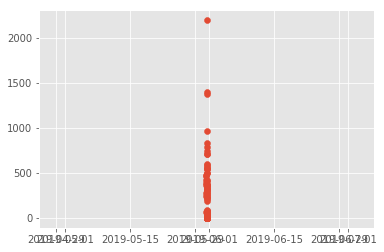

In [158]:
x = admiralbulldog_chat_by_timestamp_df2['timestamp'].tolist()
y = admiralbulldog_chat_by_timestamp_df2['msg_count'].tolist()

plt.scatter(x,y)

In [159]:
print(type(x[0]))
x[0].to_pydatetime()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


datetime.datetime(2019, 5, 31, 9, 48)

In [160]:

timestamp = x[0]
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [161]:
import time
ts = time.gmtime()
print(type(ts))
print(time.strftime("%Y-%m-%d %H:%M:%S", ts))
# 2019-06-02 05:25:29



<class 'time.struct_time'>
2019-06-12 19:21:00


In [162]:
# for time in admiralbulldog_time_stamp_list:
#     print(admiralbulldog_chat_by_timestamp_df2[time])

In [163]:
# look for unique twitch chat users, plot against time, find peaks to indicate interesting content